<a href="https://colab.research.google.com/github/Jihen-Boukhadhra/Be_Healthy/blob/main/Copy_of_Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
###############################  CAH  #############################
# Importer la librairie pandas
import pandas as pd

# Charger les données à partir du fichier Excel sans en-têtes de colonnes
X = pd.read_excel("NY-House-Dataset-Num.xlsx")

# Afficher les données
print(X)

         PRICE  BEDS  BATH  PROPERTYSQFT   LATITUDE  LONGITUDE
0       315000     2     2        1400.0  40.761255 -73.974483
1    195000000     7    10       17545.0  40.766393 -73.980991
2       260000     4     2        2015.0  40.541805 -74.196109
3        69000     3     1         445.0  40.761398 -73.974613
4     55000000     7     3       14175.0  40.767224 -73.969856
..         ...   ...   ...           ...        ...        ...
495   16500000     5     4        4105.0  40.781460 -73.980686
496     695000     3     3        1793.0  40.576391 -74.163138
497   16500000     5     4        4105.0  40.781460 -73.980686
498     695000     3     3        1793.0  40.576391 -74.163138
499     998000     5     3        1738.0  40.689803 -73.836542

[500 rows x 6 columns]


In [ ]:
#scikit-learn
import sklearn
#classe StandardScaler pour standardisation (centrage et reduction)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(X)
print(Z)

[[-0.06679132 -0.72549622 -0.31334736 -0.35510898  0.61863641 -0.18950647]
 [ 1.95243895  1.56458023  4.58270516  6.3482611   0.67193779 -0.244598  ]
 [-0.06736177  0.19053436 -0.31334736 -0.09976227 -1.65770547 -2.06575251]
 ...
 [ 0.10107596  0.64854965  0.91066577  0.76800134  0.82822074 -0.24202015]
 [-0.06285005 -0.26748093  0.2986592  -0.19193621 -1.29894885 -1.78663   ]
 [-0.0597074   0.64854965  0.2986592  -0.21477209 -0.12253545  0.97828494]]


In [ ]:
#calculer la matrice de coorélation
Coor = X.corr()

#affichage de la matrice de corrélation en pourcentage
print(Coor)

                 PRICE      BEDS      BATH  PROPERTYSQFT  LATITUDE  LONGITUDE
PRICE         1.000000  0.091849  0.138912      0.210261 -0.076929  -0.107293
BEDS          0.091849  1.000000  0.691518      0.446017 -0.069152   0.010863
BATH          0.138912  0.691518  1.000000      0.663162 -0.115406  -0.146795
PROPERTYSQFT  0.210261  0.446017  0.663162      1.000000 -0.018697  -0.084106
LATITUDE     -0.076929 -0.069152 -0.115406     -0.018697  1.000000   0.597842
LONGITUDE    -0.107293  0.010863 -0.146795     -0.084106  0.597842   1.000000


In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(Coor)

diagonal_matrix = np.diag(eigenvalues)

#affichage des valeurs propres en ordre décroissant
print(diagonal_matrix)

[[2.31472577 0.         0.         0.         0.         0.        ]
 [0.         1.56158028 0.         0.         0.         0.        ]
 [0.         0.         0.9557293  0.         0.         0.        ]
 [0.         0.         0.         0.5641011  0.         0.        ]
 [0.         0.         0.         0.         0.22663931 0.        ]
 [0.         0.         0.         0.         0.         0.37722424]]


In [ ]:
# Calcul du pourcentage de variance expliquée par chacun des axes factoriels
tot = sum(eigenvalues)
var_exp = [(i / tot)*100 for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(pandas.DataFrame({'valprop':eigenvalues,'inertie':var_exp,'inertiecum':cum_var_exp}))

    valprop    inertie  inertiecum
0  2.314726  38.578763   38.578763
1  1.561580  26.026338   64.605101
2  0.955729  15.928822   80.533922
3  0.564101   9.401685   89.935608
4  0.226639   6.287071   96.222678
5  0.377224   3.777322  100.000000


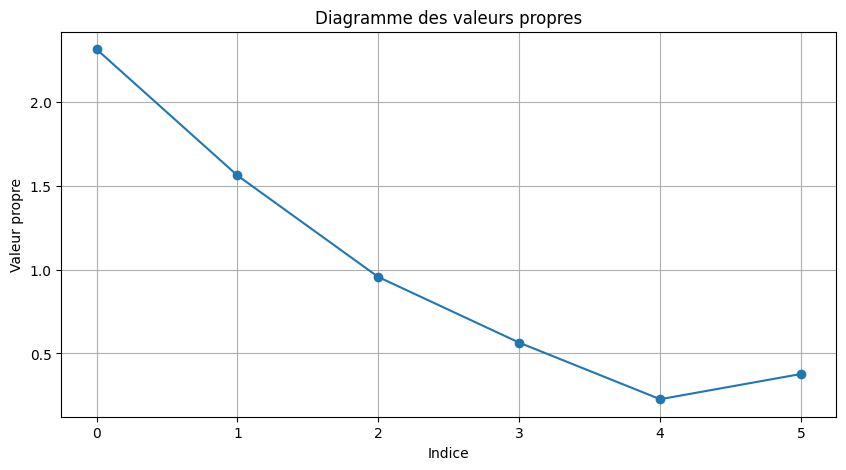

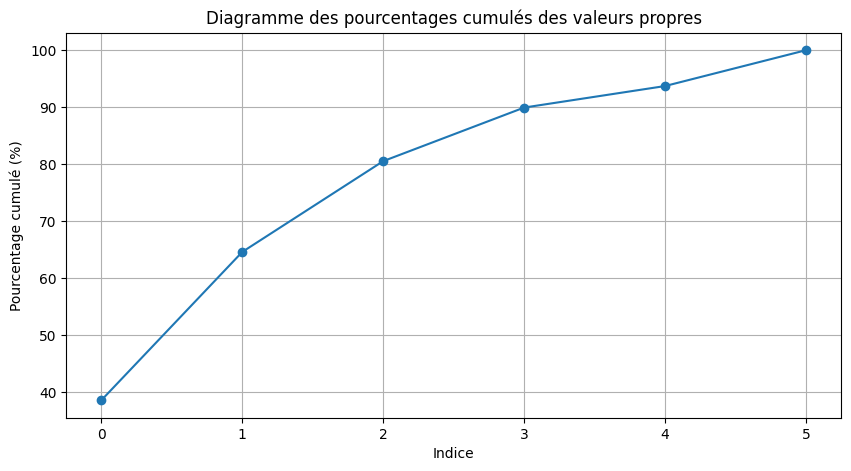

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Diagramme des valeurs propres
plt.figure(figsize=(10, 5))
plt.plot(eigenvalues, '-o')
plt.title('Diagramme des valeurs propres')
plt.xlabel('Indice')
plt.ylabel('Valeur propre')
plt.grid(True)
plt.show()

# Calcul des pourcentages cumulés
cumulative_percentages = np.cumsum(eigenvalues) / np.sum(eigenvalues) * 100

# Diagramme des pourcentages cumulés
plt.figure(figsize=(10, 5))
plt.plot(cumulative_percentages, '-o')
plt.title('Diagramme des pourcentages cumulés des valeurs propres')
plt.xlabel('Indice')
plt.ylabel('Pourcentage cumulé (%)')
plt.grid(True)
plt.show()

Coordonnées des individus dans le nouveau repère :
[[-8.33718652e-01 -3.36156005e-02]
 [ 7.14399089e+00 -2.14303901e+00]
 [ 5.66837518e-01  2.50892652e+00]
 [-1.16895781e+00  1.62061916e-02]
 [ 3.55736037e+00 -1.53357123e+00]
 [ 5.74866706e-01 -1.28617714e-03]
 [-8.03569156e-01 -5.80765632e-01]
 [ 1.30500041e+01 -2.08637356e+00]
 [-1.85638623e+00 -7.97795083e-01]
 [-1.01049447e+00  1.05931459e+00]
 [-1.52517207e+00 -6.47809473e-01]
 [ 2.80831148e-01  1.77838899e+00]
 [-9.31867670e-01 -5.77802400e-01]
 [-7.97364145e-01 -5.37441996e-01]
 [-6.93829118e-01  2.31543096e-01]
 [-1.65823041e-01  2.62193310e+00]
 [-6.40524022e-01 -5.43709180e-01]
 [-8.10280468e-01  1.37316487e+00]
 [-1.98024975e+00 -1.20420420e+00]
 [-1.04879544e+00 -4.14887241e-01]
 [-1.25433520e-01  1.63212007e+00]
 [-1.00528545e+00 -4.85438239e-01]
 [ 3.78148070e-01 -1.98494611e+00]
 [-1.05414721e+00  2.07601667e+00]
 [ 9.89319462e-02  3.26543731e+00]
 [ 8.24412596e-01 -1.23452871e+00]
 [-1.38895537e+00 -3.43932705e-01]
 [ 3

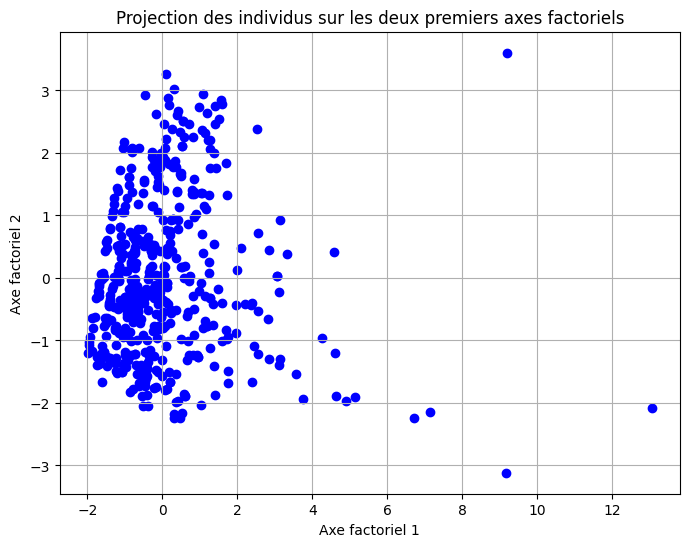

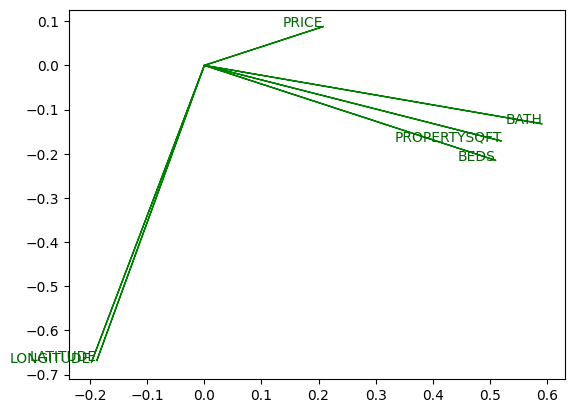

In [ ]:
selected_eigenvectors = eigenvectors[:, :2]


Tp = np.dot(Z, selected_eigenvectors)


print("Coordonnées des individus dans le nouveau repère :")
print(Tp)



plt.figure(figsize=(8, 6))
plt.scatter(Tp[:, 0], Tp[:, 1], color='blue')


plt.xlabel('Axe factoriel 1')
plt.ylabel('Axe factoriel 2')
plt.title('Projection des individus sur les deux premiers axes factoriels')
plt.grid(True)
plt.show()


for i in range(len(X.columns)):
    plt.arrow(0, 0, eigenvectors[i, 0], eigenvectors[i, 1], color='green', width=0.000000000050, head_width=0.0000005)
    plt.text(eigenvectors[i, 0], eigenvectors[i, 1], X.columns[i], color='darkgreen', ha='right')

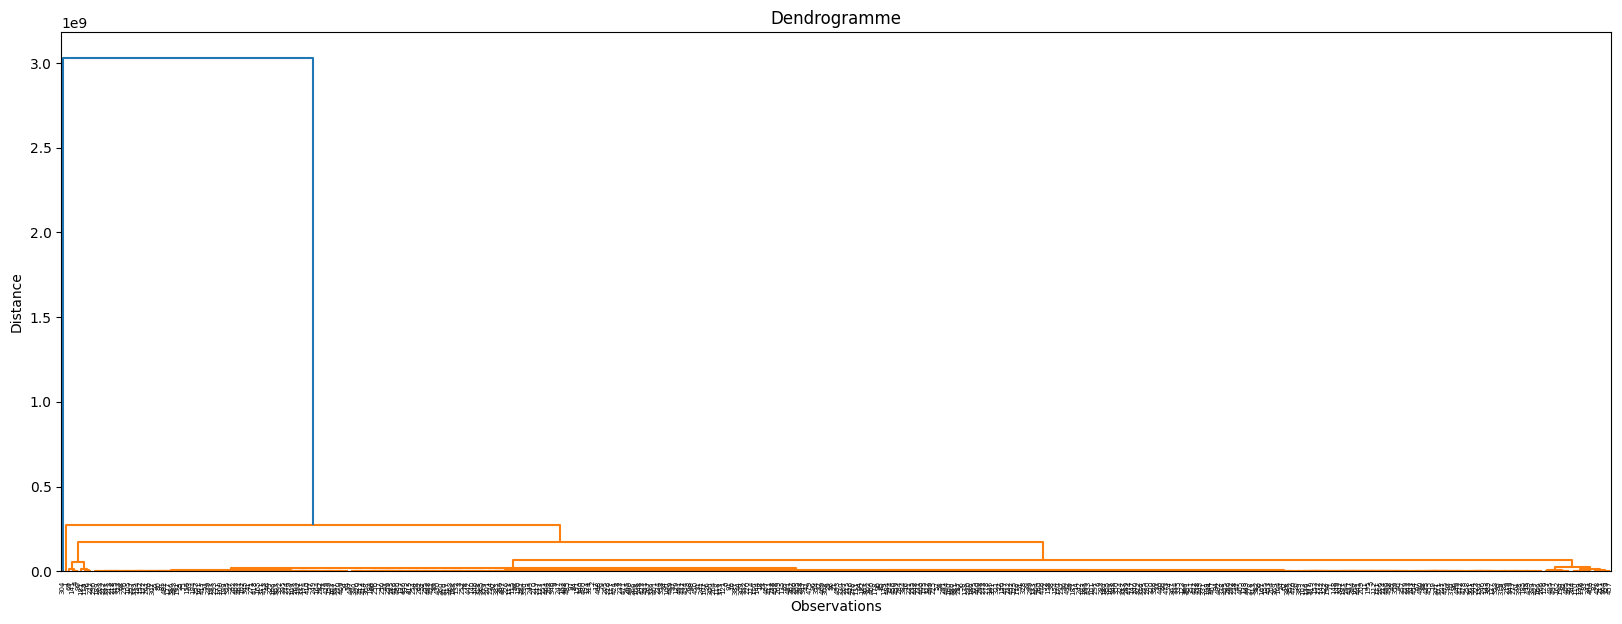

Nombre de classes retenu: 343


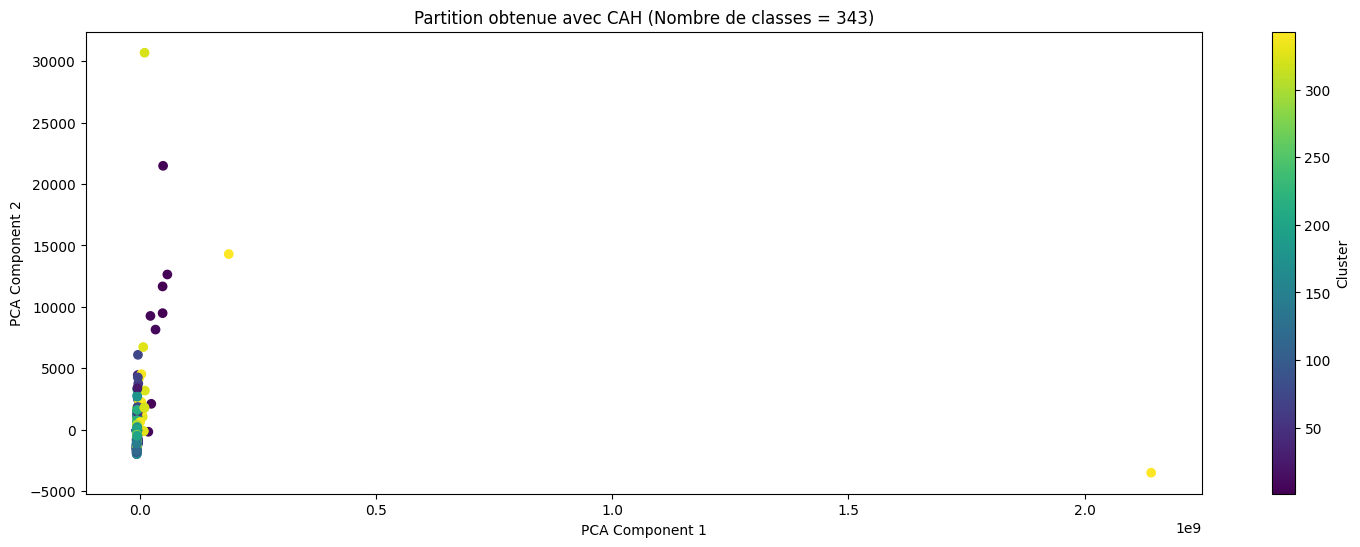

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA
# Chargement du dataset
df = pd.read_excel("NY-House-Dataset-Num.xlsx")
# Prétraitement des données (normalisation, standardisation, etc.) si nécessaire
# Calcul de la matrice de liaison avec la méthode 'ward'
Z = linkage(df, method='ward')
# Affichage du dendrogramme pour aider à déterminer le nombre de classes
plt.figure(figsize=(20, 7))
plt.title("Dendrogramme")
dendrogram(Z, labels=df.index, leaf_rotation=90)
plt.xlabel('Observations')
plt.ylabel('Distance')
plt.show()
# Détermination du nombre de classes retenues  # Vous pouvez utiliser un critère comme le critère d'Elbow ou le critère de la distance maximale entre les classes # Ici, nous allons utiliser le critère de distance maximale
max_d = 1000  # Ajustez cette valeur selon votre dendrogramme
clusters = fcluster(Z, max_d, criterion='distance')
# Réaliser la partition en spécifiant le nombre de classes retenu
k = len(np.unique(clusters))  # Nombre de classes
print("Nombre de classes retenu:", k)
# Réduction de dimension pour la visualisation
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)
# Représenter graphiquement la partition obtenue sur les plans factoriels de projection (PCA)
plt.figure(figsize=(18, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Partition obtenue avec CAH (Nombre de classes = {})'.format(k))
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')